# 問題１

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


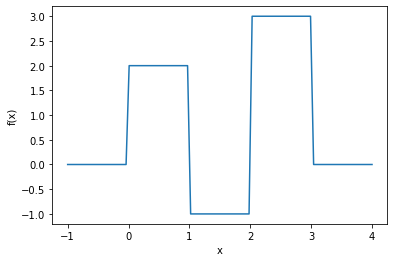

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

v = np.array([2, -2, -1, 1, 3, -3])
b = np.array([0, -1000, -1000, -2000, -2000, -3000])


def g(x):
  a = 0
  for i in range(len(v)):
    a +=v[i]/(1 + np.exp(-1000 * x - b[i]))
  return a

x = np.linspace(-1,4,100)
y = g(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)

# 問題2

In [ ]:
import numpy as np

w = np.array([[1,1],[-1,-1]])
q = np.array([[1],[1]])
b = np.array([[-0.5],[1.5]])
c = -1.5
x = np.array([[0],[0]])
h = np.maximum(np.dot(w,x) + b,np.zeros((2,1)))
print("h: ")
print(h)
y = 1/(1 + np.exp(-1 * np.dot(h.T, q) - c))
print("\ny: ")
print(y)

h: 
[[0. ]
 [1.5]]

y: 
[[0.5]]


#0: loss=0.9740769863128662
#1: loss=0.9053778648376465
#2: loss=0.8611516356468201
#3: loss=0.8329834342002869
#4: loss=0.8139966726303101
#5: loss=0.800401508808136
#6: loss=0.7901645302772522
#7: loss=0.7821409702301025
#8: loss=0.7756479382514954
#9: loss=0.7702564001083374
#10: loss=0.765683650970459
#11: loss=0.7617366909980774
#12: loss=0.758279025554657
#13: loss=0.7552118301391602
#14: loss=0.752461314201355
#15: loss=0.7499716877937317
#16: loss=0.7476997971534729
#17: loss=0.7456117868423462
#18: loss=0.7436807751655579
#19: loss=0.7418849468231201
#20: loss=0.7407540082931519
#21: loss=0.7397882342338562
#22: loss=0.7388581037521362
#23: loss=0.7379617691040039
#24: loss=0.7370975613594055
#25: loss=0.7362639904022217
#26: loss=0.7354593873023987
#27: loss=0.7346823811531067
#28: loss=0.7339316606521606
#29: loss=0.7332058548927307
#30: loss=0.7325040102005005
#31: loss=0.7318248748779297
#32: loss=0.7311674356460571
#33: loss=0.7305307984352112
#34: loss=0.7299138307571411

Text(0, 0.5, 'Loss')

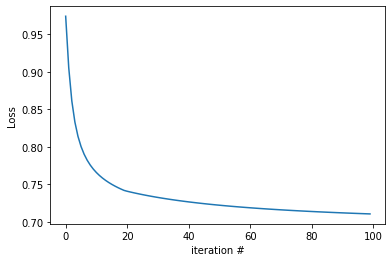

In [51]:
import torch
import matplotlib.pyplot as plt

# parameters
input_size = 2
hidden_size = 2

dtype = torch.float
w = torch.nn.Parameter(torch.tensor([[1,1],[-1,-1]],dtype=dtype))
q = torch.nn.Parameter(torch.tensor([[1],[1]],dtype=dtype))
b = torch.nn.Parameter(torch.tensor([[-0.5],[1.5]],dtype=dtype))
c = torch.nn.Parameter(torch.tensor([[-1.5]],dtype=dtype))

x = torch.tensor([[1],[1]],dtype=dtype)
y = torch.tensor([[0]],dtype=dtype)

# model
class Feedforward(torch.nn.Module):
        def __init__(self, input_size, hidden_size,activation=lambda x: x):
            super(Feedforward, self).__init__()
            self.input_size = input_size
            self.hidden_size  = hidden_size
            self.weight1 = w
            self.bias1 = b
            self.activation1 = activation
            self.relu = torch.nn.ReLU()
            self.weight2 = q
            self.bias2 = c
            self.activation2 = activation
            self.sigmoid = torch.nn.Sigmoid()

        def forward(self, x):
            hidden = self.activation1(torch.matmul(self.weight1, x) + self.bias1)
            relu = self.relu(hidden)
            output = self.activation2(torch.matmul(relu.T,self.weight2) + self.bias2)
            output = self.sigmoid(output)
            return output

# settings
model = Feedforward(input_size,hidden_size)
criterion = torch.nn.BCEWithLogitsLoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(),lr = 0.5)

loss_history = []

# train
for t in range(100):
    y_pred = model(x)
    loss = criterion(y_pred,y)
    loss_history.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f'#{t}: loss={loss.item()}')

print("--------------------------------")
print(f'w: \n{model.weight1}')
print(f'q: \n{model.weight2}')
print(f'b: \n{model.bias1}')
print(f'c: \n{model.bias2}')

# print(model.state_dict())
# print('\n')
# print(model(x))

plt.plot(loss_history)
plt.xlabel('iteration #')
plt.ylabel('Loss')